<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Метод-опорных-векторов-LinearSVC" data-toc-modified-id="Метод-опорных-векторов-LinearSVC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Метод опорных векторов LinearSVC</a></span></li><li><span><a href="#Наивные-методы-Байеса-MultinomialNB" data-toc-modified-id="Наивные-методы-Байеса-MultinomialNB-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Наивные методы Байеса MultinomialNB</a></span></li><li><span><a href="#Проверка-LinearSVC-на-тестовой-выборке" data-toc-modified-id="Проверка-LinearSVC-на-тестовой-выборке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка LinearSVC на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import pandas as pd
import seaborn as sns
import re
from tqdm import notebook
from tqdm import tqdm
import time

# библиотека nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords as nltk_stopwords

# методы и метрики библиотеки sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# модели
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [3]:
display(data.tail(10))
display(data.info())

,Unnamed: 0,text,toxic
159282,159441,"""\nNo he did not, read it again (I would have ...",0
159283,159442,"""\n Auto guides and the motoring press are not...",0
159284,159443,"""\nplease identify what part of BLP applies be...",0
159285,159444,Catalan independentism is the social movement ...,0
159286,159445,The numbers in parentheses are the additional ...,0
159287,159446,""":::::And for the second time of asking, when ...",0
159288,159447,You should be ashamed of yourself \n\nThat is ...,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,159449,And it looks like it was actually you who put ...,0
159291,159450,"""\nAnd ... I really don't think you understand...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


None

* В данном датасете 159 292 наблюдения и 3 столбца
* Столбец **Unnamed: 0** не несет какой либо смысловой нагрузки для обучения моделей и не соответствует реальному порядку по индексам, поэтому его в обучении использовать не будем
* Пропусков в данных не наблюдается
* Тест содержит комментарии на английском, в которых есть различные символы 

Всего комментариев: 159292
Позитивных комментариев: 143106 - 89.8%
Негативных комментариев: 10.2%


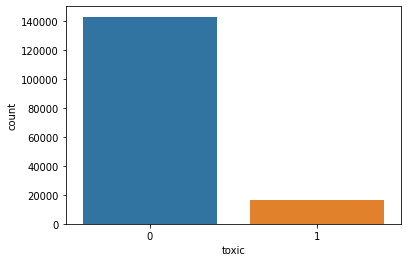

In [4]:
positive = (data[data['toxic'] == 0]).shape[0]
negative = (data[data['toxic'] == 1]).shape[0]

print(f'Всего комментариев: {data.shape[0]}')
print(f'Позитивных комментариев: {positive} - {round(positive / data.shape[0], 3) * 100}%')
print(f'Негативных комментариев: {round(negative / data.shape[0], 3) * 100}%')

sns.countplot(x='toxic', data=data);

In [5]:
lemmatizer = WordNetLemmatizer()

In [6]:
tqdm.pandas()

def clear_lemm_text(text):
    
    # удалим все символы, кроме букв английского алфавита
    clear_text = re.sub(r'[^a-zA-Z]', ' ', text)
    # удалим лишние пробелы между словами
    clear_text = ' '.join(clear_text.split())
    
    # разобьем очищенный от символов текст на отдельные токены
    tokens = nltk.word_tokenize(clear_text)
    # лемматизируем каждый токен и объединяем леммы в строку
    lemm_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
    
    return lemm_text

In [7]:
data['lemm_text'] = data['text'].progress_apply(clear_lemm_text)
data.head()

100%|██████████| 159292/159292 [01:39<00:00, 1599.39it/s]


,Unnamed: 0,text,toxic,lemm_text
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation Why the edits made under my userna...
1,1,D'aww! He matches this background colour I'm s...,0,D aww He match this background colour I m seem...
2,2,"Hey man, I'm really not trying to edit war. It...",0,Hey man I m really not trying to edit war It s...
3,3,"""\nMore\nI can't make any real suggestions on ...",0,More I can t make any real suggestion on impro...
4,4,"You, sir, are my hero. Any chance you remember...",0,You sir are my hero Any chance you remember wh...


In [8]:
features = data['lemm_text']
target = data['toxic']

SEED = 12345
CV = 2

In [9]:
# делим данные на обучающую и общую выборку в соотношении 70%:30%
features_train, features_sample, target_train, target_sample = train_test_split(features,
                                                                                target,
                                                                                test_size=0.3,
                                                                                random_state=SEED)

# делим данные на валидационную и тестовую выборку по 15%
features_valid, features_test, target_valid, target_test = train_test_split(features_sample,
                                                                            target_sample,
                                                                            test_size=0.5,
                                                                            random_state=SEED)

# проверяем, что ничего не потерялось
data.shape[0] == features_train.shape[0] + features_valid.shape[0] + features_test.shape[0]

True

In [10]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

# инициализируем векторайзер со стоп-словами
tf_idf = TfidfVectorizer(stop_words=stopwords)

# преобразуем текст в числовые вектора
features_train_tfidf = tf_idf.fit_transform(features_train)
features_valid_tfidf = tf_idf.transform(features_valid)
features_test_tfidf = tf_idf.transform(features_test)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Обучение

### Логистическая регрессия

In [17]:
%%time

lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('lr', LogisticRegression(random_state=SEED, class_weight='balanced'))
])

parameters = {
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# выполняем кросс-валидацию с подбором гиперпараметров
model_lr = RandomizedSearchCV(lr_pipeline,
                              parameters,
                              cv=2,
                              scoring='f1',
                              random_state=SEED,
                              n_jobs=-1)

# замеряем время обучения
start = time.time()
model_lr.fit(features_train, target_train)
train_time_lr = round(time.time() - start, 2)

f1_lr = model_lr.best_score_

# выводим наилучшее значение метрики и гиперпараметры модели
print(f'Метрика F1 = {f1_lr}')
print(f'Наилучшие гиперпараметры модели: {model_lr.best_params_}')
print()

Метрика F1 = 0.735939468513962
Наилучшие гиперпараметры модели: {'lr__solver': 'newton-cg'}

CPU times: user 1min 52s, sys: 1min 8s, total: 3min
Wall time: 3min 1s


### Метод опорных векторов LinearSVC

In [18]:
model_svc = LinearSVC(random_state=SEED)

# замеряем время обучения
start = time.time()
model_svc.fit(features_train_tfidf, target_train)
train_time_svc = round(time.time() - start, 2)

predictions = model_svc.predict(features_valid_tfidf)
    
f1_svc = round(f1_score(target_valid, predictions), 2)

print(f'Метрика F1 равна {f1_svc}')
print()

Метрика F1 равна 0.79



### Наивные методы Байеса MultinomialNB

In [19]:
%%time

model_nb = MultinomialNB(fit_prior=False)

# замеряем время обучения
start = time.time()
model_nb.fit(features_train_tfidf, target_train)
train_time_nb = round(time.time() - start, 2)

predictions = model_nb.predict(features_valid_tfidf)
    
f1_nb = round(f1_score(target_valid, predictions), 2)

print(f'Метрика F1 равна {f1_nb}')
print()

Метрика F1 равна 0.62

CPU times: user 56.5 ms, sys: 286 µs, total: 56.8 ms
Wall time: 54.1 ms


In [20]:
compare = pd.DataFrame({
    'Модель': ['Логистическая регрессия', 'LinearSVC', 'MultinomialNB'],
    'Значение F1': [f1_lr, f1_svc, f1_nb],
    'Время обучения': [train_time_lr, train_time_svc, train_time_nb]
})

compare

,Модель,Значение F1,Время обучения
0,Логистическая регрессия,0.735939,181.03
1,LinearSVC,0.790000,1.24
2,MultinomialNB,0.620000,0.04


<div style="border:solid silver 2px; padding: 30px">
    
* Лучшей моделью по показателям метрики f1-меры оказалась LinearSVC, поэтому проверим её на тестовых данных. По скорости обучения без дополнительных гиперпараметров она оказалась на втором месте, что является хорошим результатом
* MultinomialNB хоть и быстро обучается, но выдает результаты хуже остальных моделей и даже не дошла до границы метрики качества в 0.75

### Проверка LinearSVC на тестовой выборке

In [16]:
model_svc = LinearSVC(random_state=SEED)

model_svc.fit(features_train_tfidf, target_train)
predictions = model_svc.predict(features_test_tfidf)
    
f1_svc = round(f1_score(target_test, predictions), 2)

print(f'Метрика F1 на тестовой выборке равна {f1_svc}')
print()

Метрика F1 на тестовой выборке равна 0.77



## Выводы

<div style="border:solid silver 2px; padding: 30px">
    
* Интернет-магазину «Викишоп» для поиска токсичных комментариев стоит порекомендовать модель метода опорных векторов LinearSVC, которая показала F1-меру 0.77 на тестовом наборе данных

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны